# Code snipets for MSP

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from tqdm.auto import tqdm

## PCA

Daten einlesen

In [3]:
X1 = np.array([[0.51, 0.87],[0.77, 0.11],[0.87, 0.3 ],[0.01, 0.47],[0.31, 0.67],[0.96, 0.26],[0.51, 0.7 ],
               [0.32, 0.66],[0.54, 0.18],[0.22, 0.32],[0.81, 0.89],[0.34, 0.08],[0.54, 0.75],[0.01, 0.06],
               [0.67, 0.73],[0.21, 0.74],[0.93, 0.41],[0.37, 0.99],[0.75, 0.45],[0.76, 0.19]])

X2 = np.array([[0.51, -1.08],[0.77, -2.01],[0.87, -2.03],[0.01, 0.19],[0.31, -0.37],[0.96, -1.6],
               [0.51, -1.16],[0.32, -0.89],[0.54, -0.85],[0.22, -0.22],[0.81, -1.61],[0.34, -0.68],
               [0.54, -1.42],[0.01, -0.07],[0.67, -1.01],[0.21, -0.65],[0.93, -1.98],[0.37, -0.78],
               [0.75, -1.58],[0.76, -1.97]])

X3 = np.array([[0.08,  0.1],[0.78, 0.78],[0.44, 0.45],[0.72, 0.66],[0.98, 1.05],[0.54, 0.55],[0.5, 0.48],
               [0.07, 0.15],[0.27, 0.27],[0.5, 0.44],[0.68, 0.66],[0.8, 0.71],[0.38, 0.42],[0.07, 0.05],
               [0.29, 0.26],[0.91, 0.95],[0.21, 0.14],[0.45, 0.47],[0.93, 0.85],[0.02, -0.01]]
)
X1.shape, X2.shape, X3.shape

((20, 2), (20, 2), (20, 2))

### Kovarianzmatrix berechnen

- Auf der Diagonale: Varianzen der einzelnen Variablen
- Nicht standardisiert, abhängig von der Skala der Variablen
- Misst die Richtung der linearen Beziehung zwischen Variablen

In [14]:
def calc_cov(X):

    mean_X = np.mean(X, axis=0)

    X_ = (X-mean_X)
    C = (1/(len(X)-1)) * X_.T @ X_

    print(f"Kovarianzmatrix:\n{C} \n")

    return C


#calc covariance matrix
C1 = calc_cov(X1)

Kovarianzmatrix:
[[ 0.08474184 -0.00534816]
 [-0.00534816  0.08722395]] 



### Korrelationsmatrix berechnen

- Auf der Diagonale: Immer 1, da jede Variable perfekt mit sich selbst korreliert
- Standardisiert, Werte zwischen -1 und +11
- Misst sowohl die Stärke als auch die Richtung der linearen Beziehung
- Pearson-Korrelation bei den nicht einsen 

In [11]:
# X= Ursprüngliche Matrix, nicht Kovarianz Mtrix!!
def calc_cor(X):

    C = calc_cov(X)
    
    # Berechne die Standardabweichungen aus der Diagonale der Kovarianzmatrix
    std = np.sqrt(np.diag(C))
    
    # Berechne die Korrelationsmatrix
    R = C / np.outer(std, std)


    print(f"Korrelationsmatrix:\n{R} \n") 

    return R


# R berechnen
R1 = calc_cor(X1)

Korrelationsmatrix:
[[ 1.         -0.06220673]
 [-0.06220673  1.        ]] 



### Eigenwerte / Eigenvektoren berechnen und sortieren

In [6]:
def calc_sorted_eig( M ):
    
    ew, ev = np.linalg.eig(M)

    # Sortiere Indizes basierend auf den Eigenwerten in absteigender Reihenfolge
    idx = ew.argsort()[::-1]
    
    # Sortiere Eigenwerte und Eigenvektoren
    ew_sorted = ew[idx]
    ev_sorted = ev[:, idx]
    
    return ew_sorted, ev_sorted


A= np.array([[0,0],[1,1]])
# EW / EV berechnen
ew1, ev1 = calc_sorted_eig(A)
# ew2, ev2 = calc_sorted_eig(C2)
# ew3, ev3 = calc_sorted_eig(C3)
ew1,ev1

(array([1., 0.]),
 array([[ 0.        ,  0.70710678],
        [ 1.        , -0.70710678]]))

### Kovarianzmatrizen diagonalisieren

In [7]:
#calculate the diagonalised covariance matrix
def diag_cov_matrix(ew):
    D = np.diag(ew)
    D = np.round(D, 4)
    print(f"Diagonalised covariance matrix zu: \n{D}\n")
    return D


C1_diag = diag_cov_matrix(ew1)
C2_diag = diag_cov_matrix(ew2)
C3_diag = diag_cov_matrix(ew3)

Diagonalised covariance matrix zu: 
[[1. 0.]
 [0. 0.]]



NameError: name 'ew2' is not defined

### Varianzanteile berechnen

α1 = λ1/(λ1+λ2)

α2 = λ2/(λ1+λ2)

α1+α2= 100%

In [7]:
def varianzanteile(eigenvalues):
    total_var = np.sum(eigenvalues)
    var_anteile = eigenvalues / total_var * 100

    alpha_1 = round(var_anteile[0,0], 1) #auf die erste Dezimalstelle gerundet
    alpha_2 = round(var_anteile[1,1], 1) #auf die erste Dezimalstelle gerundet

    is_valid = True if (alpha_1+alpha_2) == 100 else False

    print(f"The varaince ist {is_valid}")
    return alpha_1, alpha_2

 
C1_var = varianzanteile(C1_diag)
C2_var = varianzanteile(C2_diag)
C3_var = varianzanteile(C3_diag)


The varaince ist True
The varaince ist True
The varaince ist True


## Lineare Regression

### Normalengleichung

wir haben folgende Matrizen

$$
X = \begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{pmatrix}, \quad
\mathbf{y} = \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}, \quad
\hat{\mathbf{y}} = \begin{pmatrix}
\hat{y}_1 \\
\hat{y}_2 \\
\vdots \\
\hat{y}_n
\end{pmatrix}, \quad \text{und} \quad
\beta = \begin{pmatrix}
q \\
m
\end{pmatrix}.
\\
$$




und berechnen Beta mit:

$$
\boldsymbol{\beta} = (X^T X)^{-1} \, X^T \, \mathbf{y}
$$

die Parameter $\boldsymbol{\beta}$ der Regressionsgerade bestimmen

In [8]:
# 1. Daten einlesen
data = pd.read_csv("le2_lineare_regression/height_weight_data.csv")        # Anpassen
x = np.array(data.height)                           # Anpassen
y = np.array(data.weight)                           # Anpassen

# 2. Daten transponieren
x_trans = np.array(x).reshape(-1, 1)
y_trans = np.array(y).reshape(-1, 1)

# 3. X und y definieren
X = np.hstack([np.ones_like(x_trans), x_trans])
y = y_trans

# 4. Beta berechnen
beta = np.linalg.inv(X.T@X)@X.T@y

Text(0, 0.5, 'Körpergewicht [kg]')

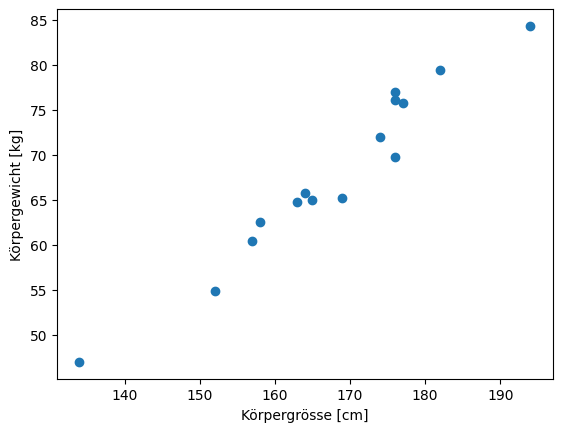

In [9]:
plt.scatter(x, y)
plt.xlabel("Körpergrösse [cm]")         # Anpassen
plt.ylabel("Körpergewicht [kg]")        # Anpassen

Mit Regressionsparameter $\boldsymbol{\beta}$ die vorhergesagten Werte $\mathbf{\hat{y}}$ berechnen: 


$\mathbf{\hat{y}} = X\boldsymbol{\beta}$

**Hinweis:** $\mathbf{\hat{y}}$ hat natürlich die gleichen Dimensionen wie $\mathbf{y}$.

In [10]:
y_hat = X@beta

np.ndim(y) == np.ndim(y_hat)
# y_hat

True

#### RSME berechnen

## Normen

### Vektornormen

Eigenschaften:
- positiv definit
- absolut homogen
- Dreiecksungleichung

In [11]:
# Summe aller !=0 Werte; keine echte Norm, da Dreiecksungleichung nicht erfüllt
def l0_norm(v):
    return np.count_nonzero(v)

# Manhattan-Norm; a^2+b^2 vom Satz des Pythagoras
def l1_norm(v):
    return np.linalg.norm(v, ord=1)

# euklydische Norm; c^2 vom Satz des Pythagoras
def l2_norm(v):
    return np.linalg.norm(v)

# läuft gegen unentlich
def lmax_norm(v):
    return np.linalg.norm(v, ord=np.inf)

# für beliebiges p Norm berechnen
def lp_norm(v, p):
    return np.linalg.norm(v, ord=p)


a= np.array([1,0,1,-2])
a_max = lmax_norm(a)
a_max

np.float64(2.0)

### Matrizennormen

Eigenschaften:
- positiv definit
- absolut homogen
- Dreiecksungleichung

In [4]:
# Matrix äquivalent zu l2
def frobenius_norm(A):
    return np.linalg.norm(A, 'fro')

# Wurzel aus grösstem EW; 
def spectral_norm(A):
    return np.linalg.norm(A, ord=2)

# gibt grösse absolute Zahl zurück
def max_norm(A):
    return np.linalg.norm(A, ord=np.inf)

# grösste Spaltensumme 
def column_norm(A):
    return np.linalg.norm(A, ord=1)

# grösste Zeilensumme 
def row_norm(A):
    return np.linalg.norm(A, ord=np.inf)

# Summe aller absoluten Werte
def sum_norm(A):
    return np.sum(np.abs(A))


# all in one
def calculate_matrix_norms(A):
    fro     = np.linalg.norm(A, 'fro')
    spekt   = np.linalg.norm(A, ord=2)
    maxi    = np.linalg.norm(A, ord=np.inf)
    colm    = np.linalg.norm(A, ord=1)
    rown    = np.linalg.norm(A, ord=np.inf)
    sumn    = np.sum(np.abs(A))

    norms = {
        "Frobenius-Norm": fro,
        "Spektral-Norm": spekt,
        "Maximum-Norm": maxi,
        "Spalten-Norm": colm,
        "Zeilen-Norm": rown,
        "Summen-Norm": sumn
    }
       
    print("Matrix:")
    print(A)
    print("\nBerechnete Matrixnormen:")
    for name, value in norms.items():
        print(f"{name}: {value}")

    # return fro, spekt, maxi, colm, rown, sumn

In [7]:
A = np.array([[1,0],[0,0]])
B = np.array([[0,0],[1,1]])
C = np.array([[0.5, 0],[0.5,0]])

norm = calculate_matrix_norms(C)
norm


Matrix:
[[0.5 0. ]
 [0.5 0. ]]

Berechnete Matrixnormen:
Frobenius-Norm: 0.7071067811865476
Spektral-Norm: 0.7071067811865476
Maximum-Norm: 0.5
Spalten-Norm: 1.0
Zeilen-Norm: 0.5
Summen-Norm: 1.0


### Distanzmasse / Metriken

Unterschiede/Distanz zwischen zwei Vektoren.

Folgende Axiome müssen gelten:
- Positiv definit
- Symetrisch
- Dreiecksungleichung

In [20]:
def distance_metrics(x, y, p=2):
    x = np.array(x)
    y = np.array(y)
    
    minkowski = np.power(np.sum(np.power(np.abs(x - y), p)), 1/p)
    euclidean = np.sqrt(np.sum((x - y)**2))
    manhattan = np.sum(np.abs(x - y))
    max =       np.sum(np.max(np.abs(x-y)))
    
    return {
        "Minkowski": minkowski,
        "Euclidean": euclidean,
        "Manhattan": manhattan, 
        "Maximum"  : max
    }

# Beispiel
x = [1,0,-1]
y = [1,2,0]

results = distance_metrics(x, y)
for metric, value in results.items():
    print(f"{metric} Distanz: {value:.4f}")


Minkowski Distanz: 2.2361
Euclidean Distanz: 2.2361
Manhattan Distanz: 3.0000
Maximum Distanz: 2.0000


### Ähnlichkeitsmasse

Vergleicht die Ähnlichkeit zweier Vektoren

Anfordernungen an x, y und s(x,y):
- Ähnlichkeit zweier identische Objekte/Vektoren = 1
- Ähnlichkeit zweier nicht identische Objekte/Vektoren < 1
- Ähnlikeitsmasse sind symetrisch

In [15]:
# vergleicht den Winkel von zwei Vektoren um deren Ähnlichkeit zu messen; 1= Winkel perfekt parralel, 0= orthogonal, -1 perfekt antiparallel
def cosine_similarity(a, b):
    cs= np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    print(f"Kosinus-Ähnlichkeit: {cs:.4f}")
    return cs


# macht nur bei hochdimensionalen Vektoren sinn
def correlation_similarity(a, b):
    p = pearsonr(a, b)[0]
    print(f"Korrelations-Ähnlichkeit: {p:.4f}")
    return p



# Beispiel
a = np.array([0.9,-1,0.7,-1.9,0.9,-1.7,0.3,-1.6,-2.7,0.6])
b = np.array([-0.5,-0.1,-0.6,-0.1,-2.5,-2.2,1.1,0.6,0.6,0.2])

cos_sim = cosine_similarity(a, b)
corr_sim = correlation_similarity(a, b)


Kosinus-Ähnlichkeit: -0.0739
Korrelations-Ähnlichkeit: -0.2168


## Recommender Systems

Cosine Similarity 

--> kolaborative filtering 

    - Item-based Collaborative Filtering (IBCF):  für Produkte ähnliche Produkte suchen und User vorschlagen

    - User-based Collaborative Filtering (UBCF): Nutzer miteinander veglichen und dann Lieblingsprodukte user A User Bb vorgeschlagen

In [16]:
# IBCF für Vektoren und Matrizen

def cosine_similarity(A, B):
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)
    dot_product = np.dot(A, B)
    return dot_product / (norm_A * norm_B)

In [22]:
X = np.array([[3,3,5,0,0,1],
              [4,3,0,1,0,1],
              [0,0,0,5,5,4],
              [0,0,0,0,0,0],
              [5,5,0,0,1,1]])




test = cosine_similarity(X.T, X)


A = np.array([0,0,5,0,1])
B = np.array([0,0,0,5,5])
similarity = cosine_similarity(A, B)


similarity, test

(np.float64(0.1386750490563073),
 array([[0.26455026, 0.24338624, 0.07936508, 0.02116402, 0.02645503,
         0.06349206],
        [0.24338624, 0.22751323, 0.07936508, 0.01587302, 0.02645503,
         0.05820106],
        [0.07936508, 0.07936508, 0.13227513, 0.        , 0.        ,
         0.02645503],
        [0.02116402, 0.01587302, 0.        , 0.13756614, 0.13227513,
         0.11111111],
        [0.02645503, 0.02645503, 0.        , 0.13227513, 0.13756614,
         0.11111111],
        [0.06349206, 0.05820106, 0.02645503, 0.11111111, 0.11111111,
         0.1005291 ]]))

## SVD

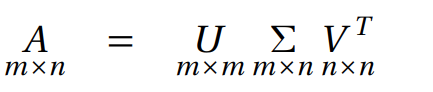

In [ ]:
A = np.array([[4, 12],[12,22]])

# svd berechnen
U, Sigma, Vt = np.linalg.svd(A)

# Quercheck ob richtige Dimension 
U.shape, Sigma.shape, Vt.shape 


data_50 = np.matrix(U[:,:50]) @ np.diag(S[:50]) @ np.matrix(V[:50,:])

plt.imshow(data_50, cmap="grey")







# mit gewünschen Norm weiterrechnen
fro, spekt, maxi, colm, rown, sumn  = calculate_matrix_norms(data)

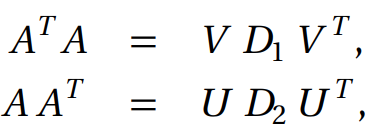

### Truncated SVD

In [ ]:
# Scree-Plot zum sehen welche Singulärwerte relevant sind
plt.plot(Sigma)

In [39]:
# A=  Originale Matrix, k Anzahl Singulärwerte die behaltet werden 
def truncated_svd(A, k):
    U, S, V = np.linalg.svd(A)

    data = np.matrix(U[:,:k]) @ np.diag(S[:k]) @ np.matrix(V[:k,:])

    # plt.imshow(data, cmap="grey")   #nur, wenn ein Bild


    return U, S, V, data

In [ ]:
# 
t_SVD = truncated_svd(data, 1200)